In [1]:
import re
from pathlib import Path

import numpy as np
import matplotlib.pyplot as plt

load data

In [2]:
data_dir = Path("comphep_data")

In [3]:
dcrsc_cos = np.genfromtxt(data_dir/"dcrsc_cos.dat", dtype=np.float64)
dcrsc_t = np.genfromtxt(data_dir/"dcrsc_t.dat", dtype=np.float64)[:, [0, 1]]
totcrsc_lowS = np.genfromtxt(data_dir/"totcrsc_lowS.dat", dtype=np.float64)
totcrsc_tail = np.genfromtxt(data_dir/"totcrsc_tail.dat", dtype=np.float64)
totcrsc_Zpeak = np.genfromtxt(data_dir/"totcrsc_Zpeak.dat", dtype=np.float64)

In [4]:
output_dir = Path("output")

In [5]:
def parse_expression(expr):
    """ FORM output to Python """
    spaces = re.compile(r"\s+")
    linear = re.sub(spaces, "", expr.replace("\n", "").split("=")[1])[:-1]
    special = linear.replace("PI", "np.pi").replace("SQRT", "np.sqrt").replace("^", "**")
    return special

kinematics here

In [6]:
def get_t_range(s):
    E1cm = np.sqrt(s)/2
    p1cm = np.sqrt(E1cm**2 - mMu**2)
    E3cm = E1cm
    p3cm = np.sqrt(E3cm**2 - mB**2)
    return -(p1cm - p3cm)**2, -(p1cm + p3cm)**2

In [7]:
def t2cos(s, t):
    E1cm = np.sqrt(s)/2
    p1cm = np.sqrt(E1cm**2 - mMu**2)
    E3cm = E1cm
    p3cm = np.sqrt(E3cm**2 - mB**2)
    return 1 - 2*(-(p1cm - p3cm)**2-t)/4/p1cm/p3cm

In [8]:
def cos2t(s, c):
    E1cm = np.sqrt(s)/2
    p1cm = np.sqrt(E1cm**2 - mMu**2)
    E3cm = E1cm
    p3cm = np.sqrt(E3cm**2 - mB**2)
    return (p1cm - p3cm)**2 - (1 - c)/2*4*p1cm*p3cm

define parameters (based on comphep default)

In [9]:
mMu = 105E-3;
mB = 4.85;
mW = 80.;
mH = 115.;
mZ = 91.2;
e = 0.313;
sW = 0.48076;
gW = e/sW;
gZ = e/sW/np.sqrt(1 - sW**2);
wZ = 2.43;
wH = 0.00617

print(f"mMu = {mMu}")
print(f"mB = {mB}")
print(f"mW = {mW}")
print(f"mH = {mH}")
print(f"mZ = {mZ}")
print(f"e = {e}")
print(f"sW = {sW}")
print(f"gW = {gW}")
print(f"gZ = {gZ}")
print(f"wZ = {wZ}")
print(f"wH = {wH}")

mMu = 0.105
mB = 4.85
mW = 80.0
mH = 115.0
mZ = 91.2
e = 0.313
sW = 0.48076
gW = 0.651052500208004
gZ = 0.7424882808409303
wZ = 2.43
wH = 0.00617


Load **differential cross-section** and define python function which will evaluate it: 

In [10]:
with open(output_dir/"dcrsc.output", "r") as fin:
    dcrsc_raw = parse_expression(fin.read())
display(dcrsc_raw)

'+t*(1/48/(1/4*s-mMu**2)*e**4*s**-2*np.pi**-1-1/24/(1/4*s-mMu**2)*e**4*mMu**2*s**-3*np.pi**-1-1/24/(1/4*s-mMu**2)*e**4*mB**2*s**-3*np.pi**-1-1/16/(1/4*s-mMu**2)/(s**2-2*mH**2*s+mH**2*wH**2+mH**4)*e**2*mB**2*mMu**2*gW**2*mW**-2*s**-1*np.pi**-1+1/16/(1/4*s-mMu**2)/(s**2-2*mH**2*s+mH**2*wH**2+mH**4)*e**2*mB**2*mMu**2*mH**2*gW**2*mW**-2*s**-2*np.pi**-1-3/256/(1/4*s-mMu**2)/(s**2-2*mH**2*s+mH**2*wH**2+mH**4)/(s**2-2*mZ**2*s+mZ**2*wZ**2+mZ**4)*mB**2*mMu**2*gW**2*gZ**2*mW**-2*s*np.pi**-1+1/16/(1/4*s-mMu**2)/(s**2-2*mH**2*s+mH**2*wH**2+mH**4)/(s**2-2*mZ**2*s+mZ**2*wZ**2+mZ**4)*mB**2*mMu**2*gW**2*gZ**2*mW**-2*sW**2*s*np.pi**-1-1/16/(1/4*s-mMu**2)/(s**2-2*mH**2*s+mH**2*wH**2+mH**4)/(s**2-2*mZ**2*s+mZ**2*wZ**2+mZ**4)*mB**2*mMu**2*gW**2*gZ**2*mW**-2*sW**4*s*np.pi**-1+3/256/(1/4*s-mMu**2)/(s**2-2*mH**2*s+mH**2*wH**2+mH**4)/(s**2-2*mZ**2*s+mZ**2*wZ**2+mZ**4)*mB**2*mMu**2*mH**2*gW**2*gZ**2*mW**-2*np.pi**-1-1/16/(1/4*s-mMu**2)/(s**2-2*mH**2*s+mH**2*wH**2+mH**4)/(s**2-2*mZ**2*s+mZ**2*wZ**2+mZ**4)*mB**2

In [11]:
def dcrsc(s, t):
    shapeS = np.zeros_like(s)+1.
    shapeT = np.zeros_like(t)+1.
    return shapeS*shapeT*eval(dcrsc_raw)

#### Differential cross-section $\frac{d \sigma}{d t}$ 

In [12]:
def show_crsc_t(fig, ax, s):
    trange = get_t_range(s)
    ts = dcrsc_t[:, 0]
    new_ts = trange[1] + (trange[0] - ts)
    crsc = dcrsc(s, new_ts)/2.56819E-9
    ax.plot(ts, np.log10(crsc))
    ax.scatter(ts[::10], np.log10(dcrsc_t[::10, 1]), color="orange")

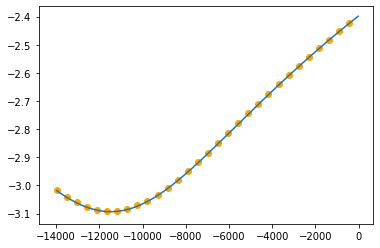

In [13]:
fig, ax = plt.subplots()
show_crsc_t(fig, ax, 120**2)

#### Differential cross-section $\frac{d \sigma}{d cos(\theta)}$ 

In [14]:
def show_crsc_costh(fig, ax, s):
    cs = dcrsc_cos[:, 0]
    ts = cos2t(s, -cs)
    trange = get_t_range(s)
    # notice jacobian
    crsc = dcrsc(s, ts)*2*np.sqrt(s/4 - mMu**2)*np.sqrt(s/4 - mB**2)/2.56819E-9
    ax.plot(cs, np.log10(crsc))
    ax.scatter(cs[::5], np.log10(dcrsc_cos[::5, 1]), color="orange")

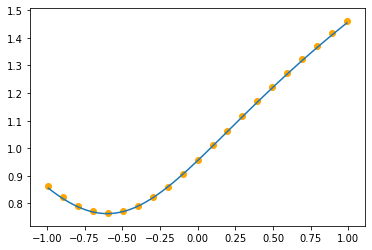

In [15]:
fig, ax = plt.subplots()
show_crsc_costh(fig, ax, 120**2)

Load **total crossection** and define corresponding python function

In [16]:
with open(output_dir/"totcrsc.output", "r") as fin:
    totcrsc_raw = parse_expression(fin.read())
display(totcrsc_raw)

'+t*(1/96/(1/4*s-mMu**2)*e**4*s**-1*np.pi**-1+1/48/(1/4*s-mMu**2)*e**4*mMu**4*s**-3*np.pi**-1+1/24/(1/4*s-mMu**2)*e**4*mB**2*mMu**2*s**-3*np.pi**-1+1/48/(1/4*s-mMu**2)*e**4*mB**4*s**-3*np.pi**-1-1/32/(1/4*s-mMu**2)/(s**2-2*mH**2*s+mH**2*wH**2+mH**4)*e**2*mB**2*mMu**2*gW**2*mW**-2*np.pi**-1+1/32/(1/4*s-mMu**2)/(s**2-2*mH**2*s+mH**2*wH**2+mH**4)*e**2*mB**2*mMu**2*mH**2*gW**2*mW**-2*s**-1*np.pi**-1+1/16/(1/4*s-mMu**2)/(s**2-2*mH**2*s+mH**2*wH**2+mH**4)*e**2*mB**2*mMu**4*gW**2*mW**-2*s**-1*np.pi**-1-1/16/(1/4*s-mMu**2)/(s**2-2*mH**2*s+mH**2*wH**2+mH**4)*e**2*mB**2*mMu**4*mH**2*gW**2*mW**-2*s**-2*np.pi**-1+1/16/(1/4*s-mMu**2)/(s**2-2*mH**2*s+mH**2*wH**2+mH**4)*e**2*mB**4*mMu**2*gW**2*mW**-2*s**-1*np.pi**-1-1/16/(1/4*s-mMu**2)/(s**2-2*mH**2*s+mH**2*wH**2+mH**4)*e**2*mB**4*mMu**2*mH**2*gW**2*mW**-2*s**-2*np.pi**-1+3/1024/(1/4*s-mMu**2)/(s**2-2*mH**2*s+mH**2*wH**2+mH**4)/(s**2-2*mH**2*s+mH**2*wH**2+mH**4)*mB**2*mMu**2*gW**4*mW**-4*s**3*np.pi**-1-3/512/(1/4*s-mMu**2)/(s**2-2*mH**2*s+mH**2*wH**2

In [17]:
def totcrsc(s):
    trange = get_t_range(s)
    return eval(totcrsc_raw, globals(), {"t": trange[0], "s": s}) - eval(totcrsc_raw, globals(), {"t": trange[1], "s": s})

#### Total crossection at low energies 

In [18]:
def show_totcrsc_lowS(fig, ax):
    sqrt_s = totcrsc_lowS[:, 0]
    ss = sqrt_s**2
    crsc = totcrsc(ss)/2.56819E-9
    ax.plot(sqrt_s, np.log10(crsc))
    ax.scatter(sqrt_s[::5], np.log10(totcrsc_lowS[::5, 1]), color="orange")

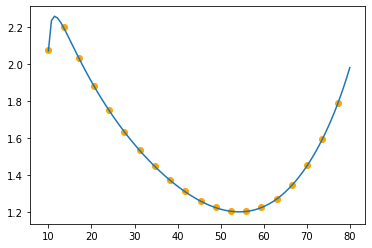

In [19]:
fig, ax = plt.subplots()
show_totcrsc_lowS(fig, ax)

#### Total cross-section at high energies (tail) 

In [20]:
def show_totcrsc_tail(fig, ax):
    sqrt_s = totcrsc_tail[:, 0]
    ss = sqrt_s**2
    crsc = totcrsc(ss)/2.56819E-9
    ax.plot(sqrt_s, np.log10(crsc))
    ax.scatter(sqrt_s[::5], np.log10(totcrsc_tail[::5, 1]), color="orange")

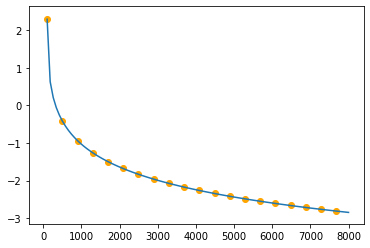

In [21]:
fig, ax = plt.subplots()
show_totcrsc_tail(fig, ax)

#### Total cross-section around Z-boson peak 

In [22]:
def show_totcrsc_Zpeak(fig, ax):
    sqrt_s = totcrsc_Zpeak[:, 0]
    ss = sqrt_s**2
    crsc = totcrsc(ss)/2.56819E-9    
    ax.plot(sqrt_s, np.log10(crsc))
    ax.scatter(sqrt_s[::5], np.log10(totcrsc_Zpeak[::5, 1]), color="orange")

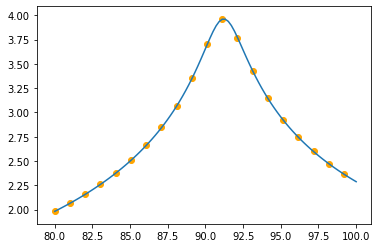

In [23]:
fig, ax = plt.subplots()
show_totcrsc_Zpeak(fig, ax)

#### Total cross-section around Higgs peak 

In [24]:
def show_totcrsc_Hpeak(fig, ax):
    sqrt_s = np.linspace(114.5, 115.5, 1000)
    ss = sqrt_s**2
    crsc = totcrsc(ss)/2.56819E-9    
    ax.plot(sqrt_s, np.log10(crsc))

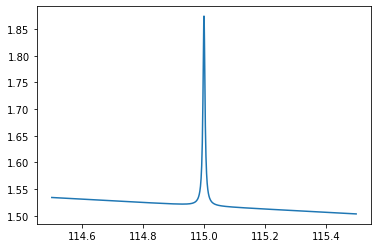

In [25]:
fig, ax = plt.subplots()
show_totcrsc_Hpeak(fig, ax)